# Midterm Project (Python Part)
## Auther: Tianshi Wang
## E-mail: wangts@umich.edu

### Library

In [148]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as offline
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline

## 1. Marginal Histogram
----

#### Load data

In [149]:
data = pd.read_csv('Race Data Entry - CRDT.csv')
df = pd.DataFrame(data)
new = df[df['Date'] == 20201101]
new = new[['Cases_Asian', 'Cases_Black', 'Cases_LatinX','Cases_White',
           'Deaths_Asian', 'Deaths_Black', 'Deaths_LatinX', 'Deaths_White']]
new = new.dropna(axis=0, how='any') # drop all rows that have any NaN values
new.head()

,Cases_Asian,Cases_Black,Cases_LatinX,Cases_White,Deaths_Asian,Deaths_Black,Deaths_LatinX,Deaths_White
60,2745.0,7621.0,75735.0,65521,68.0,185.0,1793.0,2540.0
61,36626.0,27719.0,401503.0,116385,2060.0,1308.0,8506.0,5269.0
62,1879.0,3835.0,38963.0,42337,59.0,124.0,488.0,1308.0
63,994.0,8329.0,13807.0,23943,50.0,674.0,412.0,3373.0
65,350.0,6488.0,5379.0,10018,1.0,183.0,50.0,463.0


#### Use four race categories:

In [150]:
x1 = new['Cases_Asian']
y1 = new['Deaths_Asian']
x2 = new['Cases_Black']
y2 = new['Deaths_Black']
x3 = new['Cases_LatinX']
y3 = new['Deaths_LatinX']
x4 = [float(x) for x in new['Cases_White']]
y4 = new['Deaths_White']

#### Set the parameters of plots:

In [151]:
# pre-set several values for size
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

# size of main frame and marginal frames
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# range of x-axis and y-axis
xmax = max(np.max(x1), np.max(x2), np.max(x3))
ymax = max(np.max(y1), np.max(y2), np.max(y3))
binsx = np.arange(0, xmax + 1000, 9000)
binsy = np.arange(0, ymax + 200, 200)

#### Make the marginal histogram:

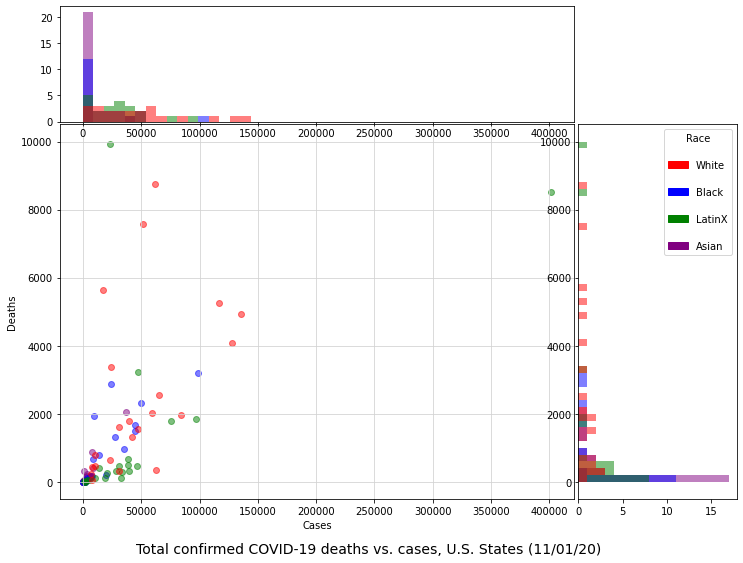

In [152]:
# draw main plot
fig = plt.figure(figsize=(11, 8))
ax = fig.add_axes(rect_scatter)

# labels, title, and grid for the main plot
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.title('Total confirmed COVID-19 deaths vs. cases, U.S. States (11/01/20)',
          x = 0.6, y = -0.16, fontsize = 14)
plt.grid(color='LightGrey')

# match continents with different colors
purple_patch = mpatches.Patch(color='purple', label='Asian')
blue_patch = mpatches.Patch(color='blue', label='Black')
green_patch = mpatches.Patch(color='green', label='LatinX')
red_patch = mpatches.Patch(color='red', label='White')

# make marginal frames
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# plot 4 race categories one by one
ax.scatter(x1, y1, color = 'purple', alpha = 0.5)
ax_histx.hist(x1, bins=binsx, color = 'purple', alpha = 0.5)
ax_histy.hist(y1, bins=binsy, orientation='horizontal', color = 'purple', alpha = 0.5)
ax.scatter(x2, y2, color = 'blue', alpha = 0.5)
ax_histx.hist(x2, bins=binsx, color = 'blue', alpha = 0.5)
ax_histy.hist(y2, bins=binsy, orientation='horizontal', color = 'blue', alpha = 0.5)
ax.scatter(x3, y3, color = 'green', alpha = 0.5)
ax_histx.hist(x3, bins=binsx, color = 'green', alpha = 0.5)
ax_histy.hist(y3, bins=binsy, orientation='horizontal', color = 'green', alpha = 0.5)
ax.scatter(x4, y4, color = 'red', alpha = 0.5)
ax_histx.hist(x4, bins=binsx, color = 'red', alpha = 0.5)
ax_histy.hist(y4, bins=binsy, orientation='horizontal', color = 'red', alpha = 0.5)

# add legend 
plt.legend(handles=[red_patch, blue_patch, green_patch, purple_patch],
           title='Race', loc = 'best')

plt.savefig("python_marginal.png", dpi=200, bbox_inches='tight')
plt.show()

## 2. Bubble Plot 
----

#### Load data

In [153]:
data2 = pd.read_csv("owid-covid-data.csv")
df2 = pd.DataFrame(data2)

#### Data preprocessing

In [154]:
new2 = df2[df2['date'] == '2020-10-20']
new2 = new2[['continent', 'total_deaths_per_million', 
             'stringency_index', 'human_development_index']]
new2 = new2.dropna(axis=0, how='any') # drop all rows that have any NaN values
new2.head()

,continent,total_deaths_per_million,stringency_index,human_development_index
527,Asia,38.455,16.67,0.498
756,Africa,7.515,71.30,0.581
1222,Europe,157.759,42.59,0.785
1465,Europe,802.433,53.70,0.858
1776,Asia,47.116,52.78,0.863


In [155]:
# extract the useful variables
x = new2['stringency_index']
y = new2['human_development_index']
colors = {'Africa':'red', 'Asia':'blue', 'Europe':'green',
          'North America':'purple', 'Oceania': 'orange',
          'South America': 'yellow'}
area = new2['total_deaths_per_million']

### Using seaborn

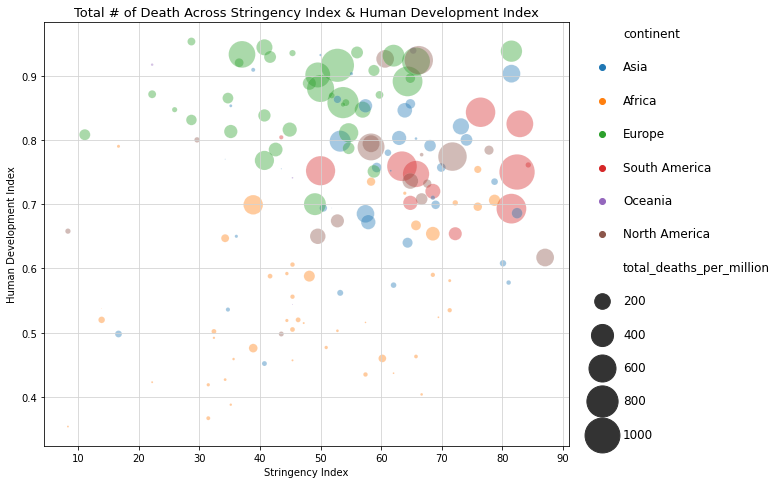

In [156]:
# draw plot using seaborn
plt.figure(figsize=(11, 7))
sns.scatterplot(x='stringency_index',
                y='human_development_index',
                size=new2['total_deaths_per_million'],
                sizes = (0, 1250),
                alpha=0.4,
                hue=new2['continent'],
                data=new2)

# put the legend out of the figure
plt.legend(bbox_to_anchor=(1.03, 1),borderaxespad=0,
           prop={'size':12}, handlelength=2,
          frameon=False)

# update label spacing to avoid legend overlapping
plt.rcParams.update({'legend.labelspacing':1.7})

# set labels, title, grid, and layout
plt.xlabel('Stringency Index')
plt.ylabel('Human Development Index')
plt.title('Total # of Death Across Stringency Index & Human Development Index',
         fontsize = 13)
plt.grid(color='LightGrey')
plt.tight_layout()
plt.savefig("python_bubble_seaborn.png", dpi=200, bbox_inches='tight')

### Using matplotlib

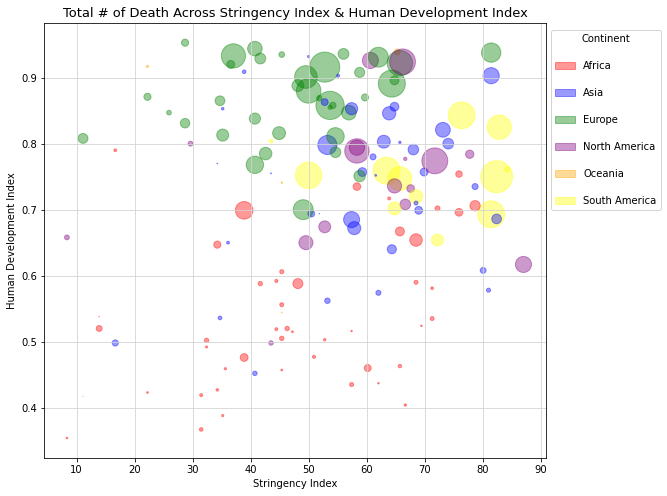

In [157]:
# merge the data
continent_list = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
color_list = ['red', 'blue', 'green', 'purple', 'orange', 'yellow']
l = []
for i in range(6):
    l.append(mpatches.Patch( color=color_list[i],
                             alpha=0.4,
                             label=continent_list[i]))

# make the plot
plt.figure(figsize = (9,8))
plt.scatter('stringency_index',
            'human_development_index',
            s='total_deaths_per_million',
            c=new2['continent'].apply(lambda x: colors[x]),
            alpha=0.4,
            data=new2)

# set labels, title, grid, and layout
plt.grid(color='LightGrey')
plt.xlabel('Stringency Index')
plt.ylabel('Human Development Index')
plt.title('Total # of Death Across Stringency Index & Human Development Index',
         fontsize = 13)
plt.legend(title = 'Continent', handles=l, loc = (1.01,0.57))
plt.savefig("python_bubble_matplotlib.png", dpi=200, bbox_inches='tight')
plt.show()

## 3. Interactive Plot (Plotly)

#### Load data

In [158]:
new3 = df2[df2['date'] == '2020-10-20']
new3 = new3[['location', 'total_cases_per_million', 'total_deaths_per_million',
             'hosp_patients_per_million',  'total_tests_per_thousand']]
new3 = new3.dropna(axis=0, how='any')[0:5]
new3.head()

,location,total_cases_per_million,total_deaths_per_million,hosp_patients_per_million,total_tests_per_thousand
3186,Austria,7395.963,102.039,82.608,218.961
4027,Belgium,22606.875,906.156,256.178,370.342
5204,Bulgaria,4393.357,145.068,224.798,88.278
12758,Czech Republic,16991.531,141.283,412.458,176.115
13840,Denmark,6188.319,118.435,22.099,806.484


#### Make the interactive plot

In [159]:
branches = new3['location']
total_cases_per_million = np.log10(new3['total_cases_per_million'])
total_deaths_per_million = np.log10(new3['total_deaths_per_million'])
hosp_patients_per_million = np.log10(new3['hosp_patients_per_million'])
total_tests_per_thousand = np.log10(new3['total_tests_per_thousand']*1000)

# make 4 traces for 4 variables
trace1 = go.Bar(
    x = branches,
    y = total_cases_per_million,
    name = 'Cases',
    marker = {'color': 'lightblue'}
)
trace2 = go.Bar(
    x = branches,
    y = total_deaths_per_million,
    name = 'Deaths',
    marker = {'color': 'steelblue'}
)
trace3 = go.Bar(
    x = branches,
    y = hosp_patients_per_million,
    name = 'Hospitalizations',
    marker = {'color': 'darkseagreen'}
)
trace4 = go.Bar(
    x = branches,
    y = total_tests_per_thousand,
    name = 'Tests',
    marker = {'color': 'forestgreen'}
)

# merge the data
data = [trace1, trace2, trace3, trace4]

# set values of layout
layout = go.Layout(
    title = 'Comparison of Cases, Deaths, Hospitalizations, and Testing',
    barmode = 'group')

# make the plot
fig = go.Figure(data = data, layout = layout)

# set labels & change layout
fig.update_xaxes(title_text='Countries')
fig.update_yaxes(title_text='log10(# per Mil.)')
fig.update_layout
offline.plot(fig, filename='interactive.html')

'interactive.html'